In [40]:
import csv
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
# Load Data
sentences = []
labels = []

with open("dataset/spam_dataset.csv", encoding="ISO-8859-1") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        if row[0] == "ham":
            labels.append(0)
        else:
            labels.append(1)
        sentences.append(row[1])

In [22]:
print("num sentences: ", len(sentences))
print("num labels: ", len(labels))

num sentences:  5572
num labels:  5572


In [24]:
# Split training and testing data
split = int(len(sentences)*0.85)

training_x = sentences[:split]
testing_x = sentences[split:]
training_y = labels[:split]
testing_y = labels[split:]

In [56]:
# Tokenize & Fit Data
tokenizer = Tokenizer(num_words=500, oov_token="<OOV>")
tokenizer.fit_on_texts(training_x)

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_x)
padded = pad_sequences(sequences)

max_sequence_len = max([len(x) for x in sequences])
testing_sequences = tokenizer.texts_to_sequences(testing_x)
testing_padded = pad_sequences(testing_sequences,maxlen=max_sequence_len)

print(testing_padded)
print("max sequence length: ", max_sequence_len)

[[  0   0   0 ...   1  99 398]
 [  0   0   0 ...   3 107  11]
 [  0   0   0 ...  37   7  72]
 ...
 [  0   0   0 ...  99 280   1]
 [  0   0   0 ... 232  13  49]
 [  0   0   0 ...   3  66 274]]
max sequence length:  189


In [48]:
# Create Numpy Arrays
training_padded = np.array(padded)
training_labels = np.array(training_y)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_y)

In [49]:
# Create Keras Model
# https://keras.io/guides/sequential_model/

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=max_sequence_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 189, 16)           80000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 189, 64)          12544     
 nal)                                                            
                                                                 
 conv1d_1 (Conv1D)           (None, 185, 64)           20544     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 46, 64)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2944)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2944)             

In [50]:
# Run Training
num_epochs = 20
history = model.fit(training_padded,
                    training_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels),
                    verbose=1)

Epoch 1/20
148/148 [==============================] - 12s 66ms/step - loss: 0.2215 - accuracy: 0.9177 - val_loss: 0.0668 - val_accuracy: 0.9761
Epoch 2/20
148/148 [==============================] - 9s 62ms/step - loss: 0.0693 - accuracy: 0.9802 - val_loss: 0.0605 - val_accuracy: 0.9785
Epoch 3/20
148/148 [==============================] - 9s 60ms/step - loss: 0.0577 - accuracy: 0.9859 - val_loss: 0.0470 - val_accuracy: 0.9856
Epoch 4/20
148/148 [==============================] - 9s 58ms/step - loss: 0.0439 - accuracy: 0.9869 - val_loss: 0.0751 - val_accuracy: 0.9856
Epoch 5/20
148/148 [==============================] - 11s 73ms/step - loss: 0.0379 - accuracy: 0.9897 - val_loss: 0.0460 - val_accuracy: 0.9844
Epoch 6/20
148/148 [==============================] - 11s 77ms/step - loss: 0.0351 - accuracy: 0.9899 - val_loss: 0.0450 - val_accuracy: 0.9880
Epoch 7/20
148/148 [==============================] - 10s 64ms/step - loss: 0.0349 - accuracy: 0.9903 - val_loss: 0.0460 - val_accuracy: 0.

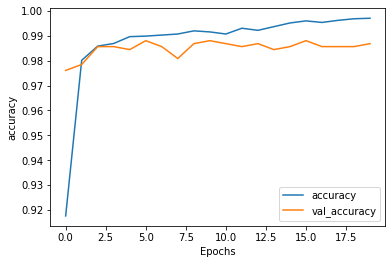

In [51]:
# Plot Accuracy

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

In [53]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets
